# **Research Question**

Can analysis of user profile, friendship groupings (Circles) and ego network on facebook reveal underlying patterns and factors that influence the formation and composition of socially cohesive communities?


# **Introduction**

This research investigates the formation and characteristics of facebook's social communities. This project uses a unique dataset consisting of userprofile, friendship grouping circles and ego network centered on individual users.
Utilizing the networkx library in python, I conduct a comprehensive analysis of this social network. The project emphasizes on various network properties; structure, degree distribution, connected components, path lengths, clustering coefficients, centrality measures and network density.

By taking these attributes in action, we aim to identify the key factors that influence the formation and composition of social communities on facebook. Understanding these networks can provide various valuable insights in many fields.




# **Methodology:**

*   **Data acquisition and presentation:** the research begins with extracting a tar.gz zipped file that contains the social network data. On extraction of the file, ‘facebook_combined.txt’ is taken into use, as it contains the data network structure of facebook connections.
*   **Building network and analysis:** further in the process, the networkx library is taken in use to construct the facebook network graph. The largest group of nodes is identified and analyzed for its structural properties.
*   **Degree distribution and analysis :** the section depicts how any connections(Degrees ) each node in the network has. Analyzing this distribution provides us with info about the overall pattern of connectivity within the network
*   **Connected component analysis**: the number of separate groups and the interconnected nodes are identified.
*   **Path analysis:** this section focuses on finding the shortest path between nodes and the average shortest path length is also calculated to understand the overall efficiency of the information flow within the network.
*   **Centrality analysis:** Degree centrality, which is an important measure based on its connections, is calculated for each node.
*   **Cluster coefficient and network density analysis:** in this part of the project, we calculate the clustering coefficient, which reflects how tightly connected the node's neighbors are. The network density is also calculated, which shows us how many connections exist compared to the total possible connections. These matrices help us identify the local connections and the overall size of the network.
*   **Comparison with network modes (ER,BA,WS):** the last and the final step involves the comparison with three different theoretical network nodes;
Erdos Renyi(ER) model: a random network with a fixed probability of connection between two nodes.
Watts Strogatz(WS) model: it's A small world network with high clustering but with short average path length.
Barabasi Albert(BA) Model: it’s a scale free network where new nodes connect preferentially to the existing highly connected nodes.







In [ ]:
#Importing necessary libraries


import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from networkx.drawing.layout import spring_layout, circular_layout, spectral_layout
from networkx.drawing.layout import kamada_kawai_layout
import requests
import random



In [ ]:
#Reading the Facebook_combined.txt dataset file

url = 'https://raw.githubusercontent.com/Rakshit10Verma/B107-Data-driven/main/facebook_combined.txt'
response= requests.get(url)
file_content = response.text
with open("facebook_combined.txt", "w") as f:
  f.write(file_content)

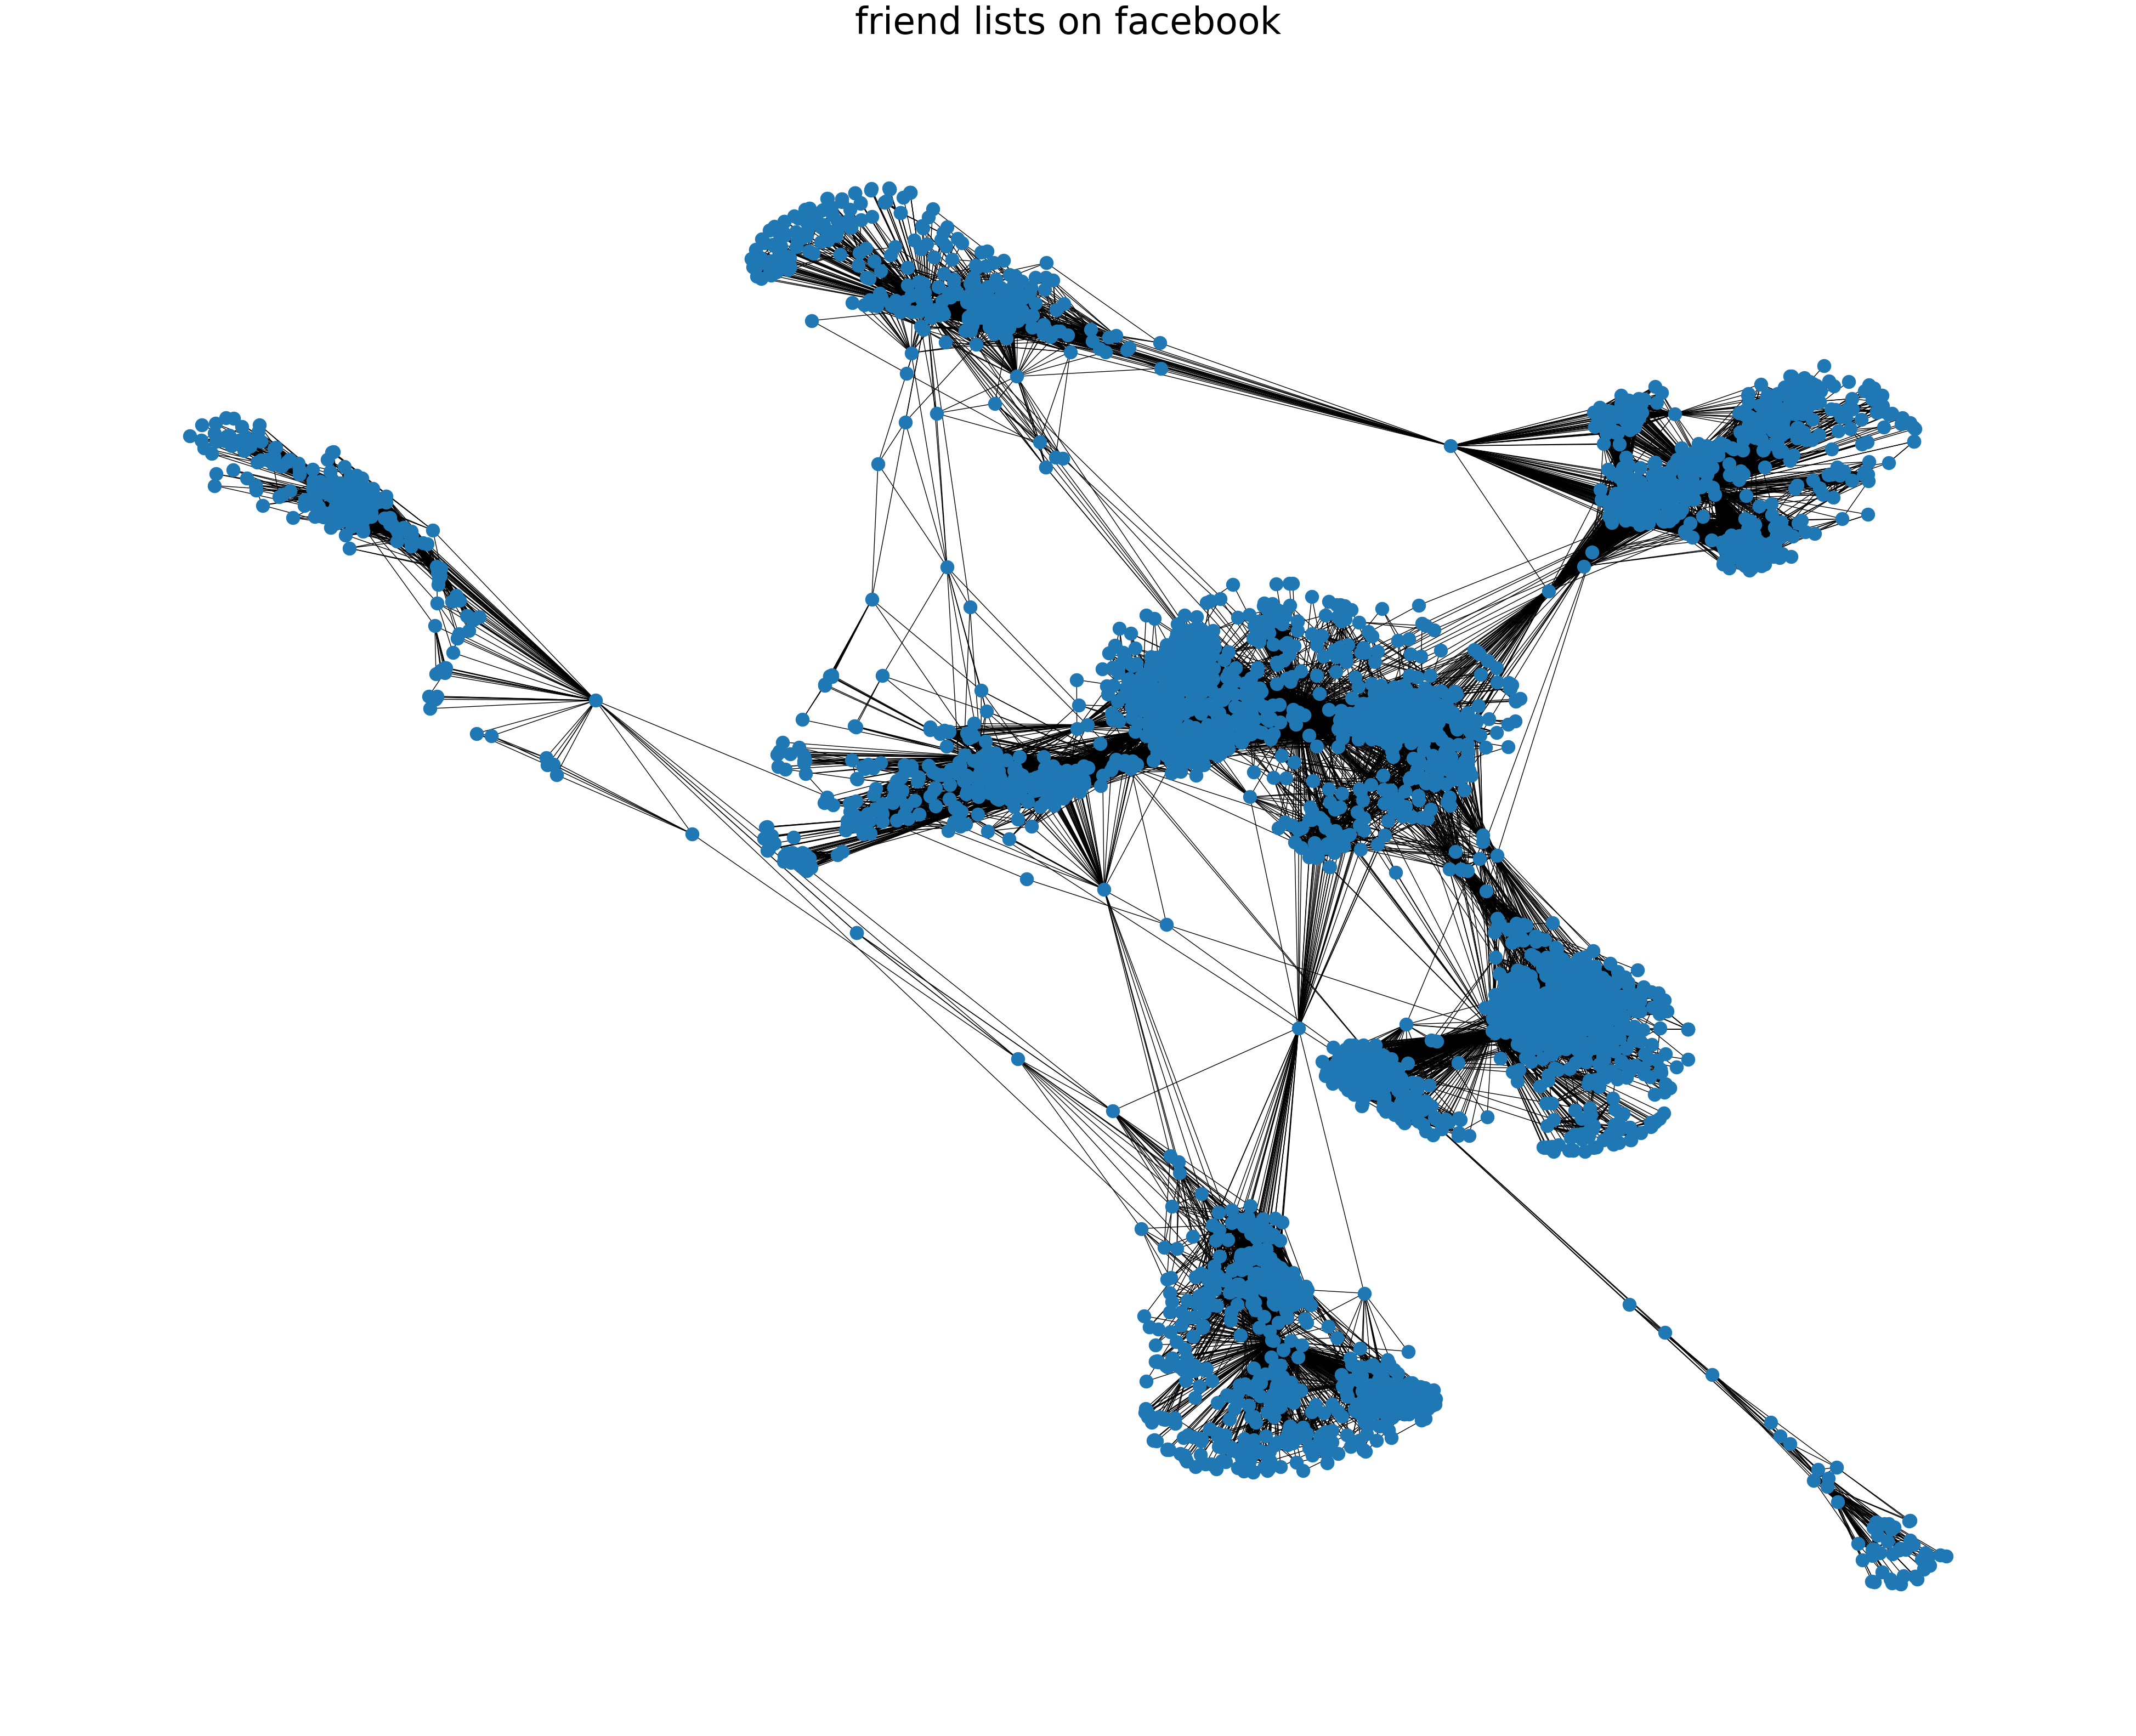

In [ ]:
#Network construction of friend lists(Circles) on facebook
G= nx.read_edgelist('facebook_combined.txt', create_using=nx.Graph(),nodetype=int)
fig, ax = plt.subplots(figsize=(50, 40)) #Plot resoltion
ax.tick_params(left=True, bottom=True, labelleft=True, labelbottom=True) #tick parameters setting
ax.set_title("friend lists on facebook", fontsize=48) #graph title
lyt= nx.spring_layout(G)
nx.draw(G, lyt, ax=ax, with_labels=False)
plt.show()

Text(0, 0.5, 'Frequency')

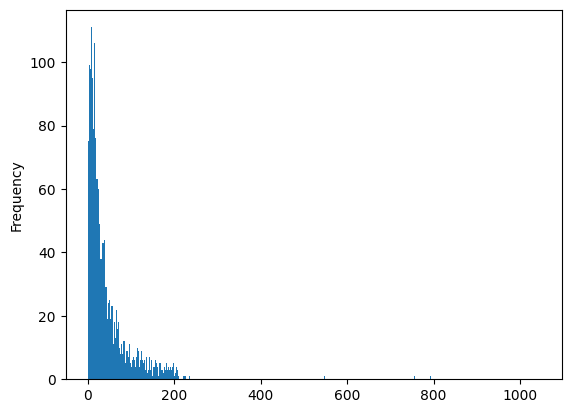

In [ ]:
#degree distribution
degrees= dict(G.degree())
plt.hist(degrees.values(), bins=range(min(degrees.values()), max(degrees.values())))
plt.ylabel('Frequency')

In [ ]:
#Identifing the Average degree
average_degree=sum(dict(G.degree()).values())/len(G)
print("The Average Degree is: ", average_degree)


The Average Degree is:  43.69101262688784


In [ ]:
#Extracting Density
density = nx.density(G)
print("Density is", density)

#Finding Degree density
degrees= dict(G.degree())
print('Degrees', degrees)

Density is 0.010819963503439287
Degrees {0: 347, 1: 17, 2: 10, 3: 17, 4: 10, 5: 13, 6: 6, 7: 20, 8: 8, 9: 57, 10: 10, 11: 1, 12: 1, 13: 31, 14: 15, 15: 1, 16: 9, 17: 13, 18: 1, 19: 16, 20: 15, 21: 65, 22: 11, 23: 17, 24: 16, 25: 69, 26: 68, 27: 5, 28: 13, 29: 13, 30: 17, 31: 23, 32: 6, 33: 2, 34: 5, 35: 2, 36: 11, 37: 1, 38: 9, 39: 15, 40: 44, 41: 24, 42: 2, 43: 1, 44: 6, 45: 12, 46: 5, 47: 2, 48: 22, 49: 4, 50: 11, 51: 7, 52: 2, 53: 31, 54: 8, 55: 17, 56: 78, 57: 15, 58: 12, 59: 19, 60: 8, 61: 3, 62: 26, 63: 6, 64: 7, 65: 12, 66: 15, 67: 76, 68: 9, 69: 10, 70: 2, 71: 3, 72: 24, 73: 10, 74: 1, 75: 14, 76: 3, 77: 6, 78: 9, 79: 12, 80: 23, 81: 3, 82: 34, 83: 7, 84: 13, 85: 14, 86: 6, 87: 13, 88: 20, 89: 8, 90: 2, 91: 8, 92: 21, 93: 8, 94: 22, 95: 6, 96: 9, 97: 3, 98: 49, 99: 13, 100: 9, 101: 19, 102: 6, 103: 16, 104: 32, 105: 14, 106: 8, 107: 1045, 108: 13, 109: 37, 110: 5, 111: 14, 112: 3, 113: 40, 114: 1, 115: 21, 116: 17, 117: 6, 118: 36, 119: 62, 120: 4, 121: 12, 122: 63, 123: 18, 12

In [ ]:
#Finding the average shortest path
shortest_path= nx.shortest_path_length(G)
#Total paths length
all= [length for source_paths in shortest_path for length in source_paths[1].values()]
average= np.mean(all)
print("Average shortset path length is",average)


Average shortset path length is 3.691592636562027


Average clustering is  0.6055467186200876
Clustering Coefficient is {0: 0.04196165314587463, 1: 0.41911764705882354, 2: 0.8888888888888888, 3: 0.6323529411764706, 4: 0.8666666666666667, 5: 0.3333333333333333, 6: 0.9333333333333333, 7: 0.43157894736842106, 8: 0.6785714285714286, 9: 0.39724310776942356, 10: 0.8222222222222222, 11: 0, 12: 0, 13: 0.6516129032258065, 14: 0.7428571428571429, 15: 0, 16: 0.6666666666666666, 17: 0.7307692307692307, 18: 0, 19: 0.2833333333333333, 20: 0.6857142857142857, 21: 0.3490384615384615, 22: 0.4727272727272727, 23: 0.16911764705882354, 24: 0.9, 25: 0.2885763000852515, 26: 0.4113257243195786, 27: 0.9, 28: 0.7692307692307693, 29: 0.46153846153846156, 30: 0.5, 31: 0.43478260869565216, 32: 1.0, 33: 1.0, 34: 0.6, 35: 1.0, 36: 0.9636363636363636, 37: 0, 38: 0.3611111111111111, 39: 0.49523809523809526, 40: 0.4048625792811839, 41: 0.4673913043478261, 42: 1.0, 43: 0, 44: 1.0, 45: 0.7272727272727273, 46: 1.0, 47: 1.0, 48: 0.329004329004329, 49: 0.5, 50: 0.5636363636

Text(0.5, 1.0, 'Scatter Plot of Clustering Coefficients')

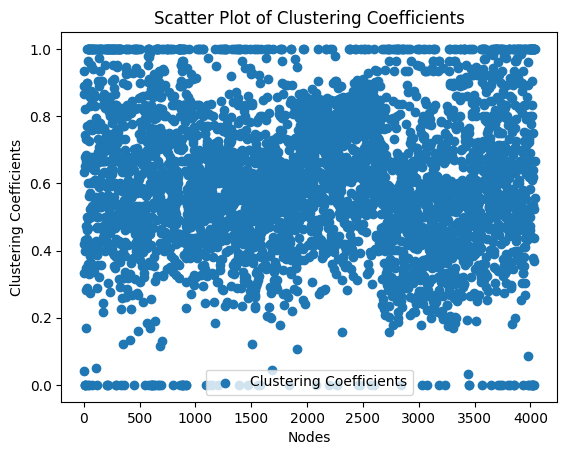

In [ ]:
#clustering
clustering=nx.average_clustering(G)
print("Average clustering is ", clustering)

#clustering coefficients
clustering_coefficient = nx.clustering(G)
print('Clustering Coefficient is', clustering_coefficient)

#Calculate average clustering coefficient
average_clustering_coefficient = sum(clustering_coefficient.values())/ len(G)
print('Average Clustering Coefficient is', average_clustering_coefficient)

# Extracting x and y values for the scatter plot
nodes=list(clustering_coefficient.keys())
coefficients = list(clustering_coefficient.values())

# Creation of a scatterplot
plt.scatter(nodes, coefficients, label = 'Clustering Coefficients')
plt.xlabel('Nodes')
plt.ylabel('Clustering Coefficients')
plt.legend()
plt. title('Scatter Plot of Clustering Coefficients')

In [ ]:
#Erdos-Renyi(ER)graph
rand_graph = nx.erdos_renyi_graph(G.number_of_nodes(), p = 0.02)
#Watts_Strogatz(WS)graph
watts_graph = nx. watts_strogatz_graph(G.number_of_nodes(), k=4, p= 0.05)
#Barabasi-Albert(BA) graph
barabasi_graph= nx.barabasi_albert_graph(G.number_of_nodes(), m = 5)

#Computing and comparing with ER random graph
print("--Comparing with Erdos Renyi's Graph--")
print("ER Random Graph Edges are:", rand_graph.number_of_edges())
print("ER Random Graph Clustering Coefficient is:", nx.average_clustering(barabasi_graph.to_undirected()))
#Computing and comparing with WS random graph
print("--Comparing with Watts-Strogatz random graph--")
print("WS Random Graph Edges are:", watts_graph.number_of_edges())
print("WS Random Graph CLustering Coefficient is:", nx. average_clustering(watts_graph.to_undirected()))
#Computing and comparing with BA random graph
print("--Comparing with Barabasi-Albert random graph--")
print("BA Random Graph Edges are:", barabasi_graph.number_of_edges())
print("BA Random Graph CLustering Coefficient is:", nx. average_clustering(barabasi_graph.to_undirected()))


--Comparing with Erdos Renyi's Graph--
ER Random Graph Edges are: 163435
ER Random Graph Clustering Coefficient is: 0.015197178932639593
--Comparing with Watts-Strogatz random graph--
WS Random Graph Edges are: 8078
WS Random Graph CLustering Coefficient is: 0.435825699430549
--Comparing with Barabasi-Albert random graph--
BA Random Graph Edges are: 20170
BA Random Graph CLustering Coefficient is: 0.015197178932639593


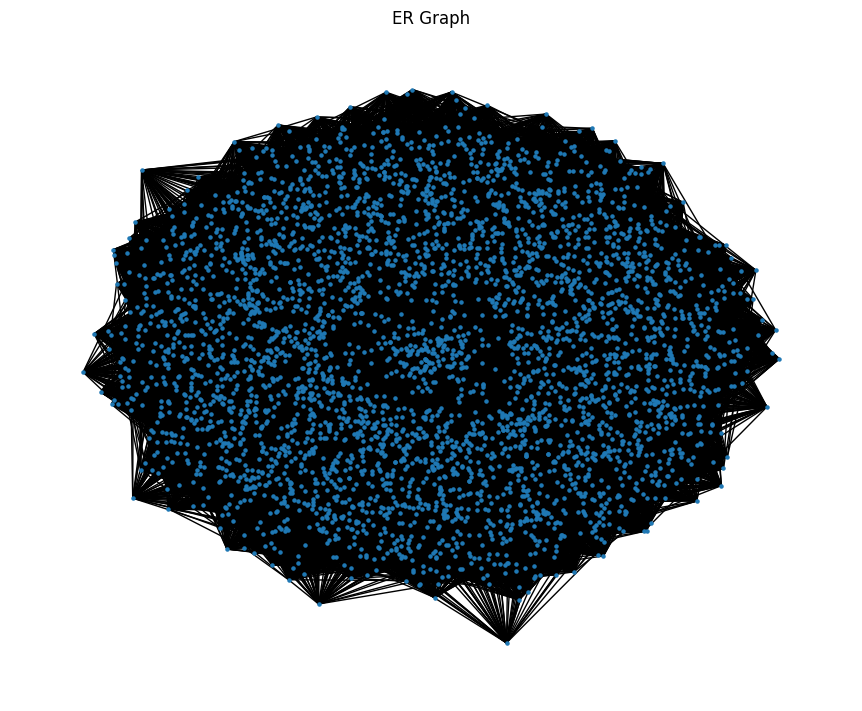

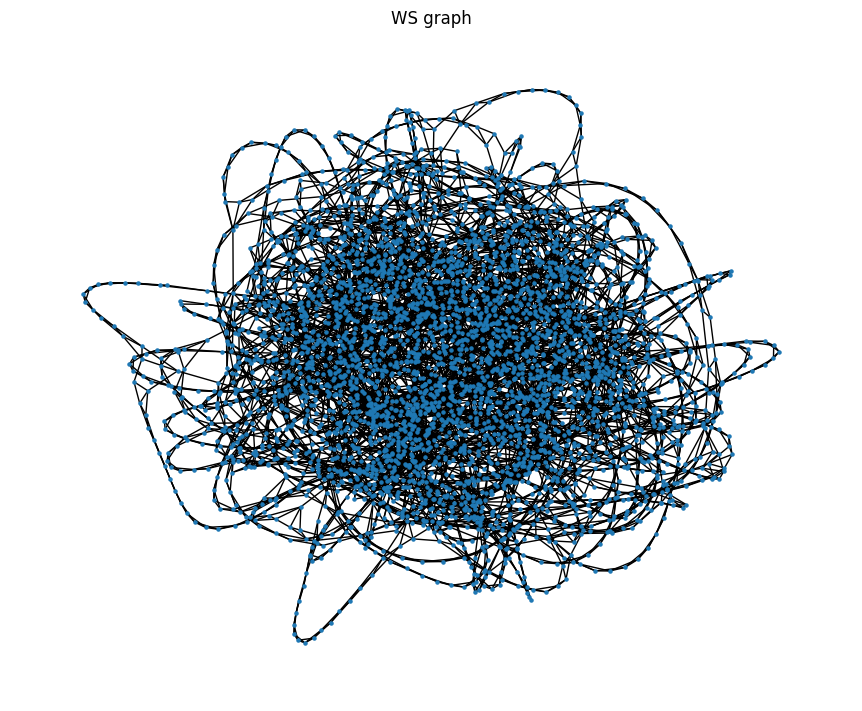

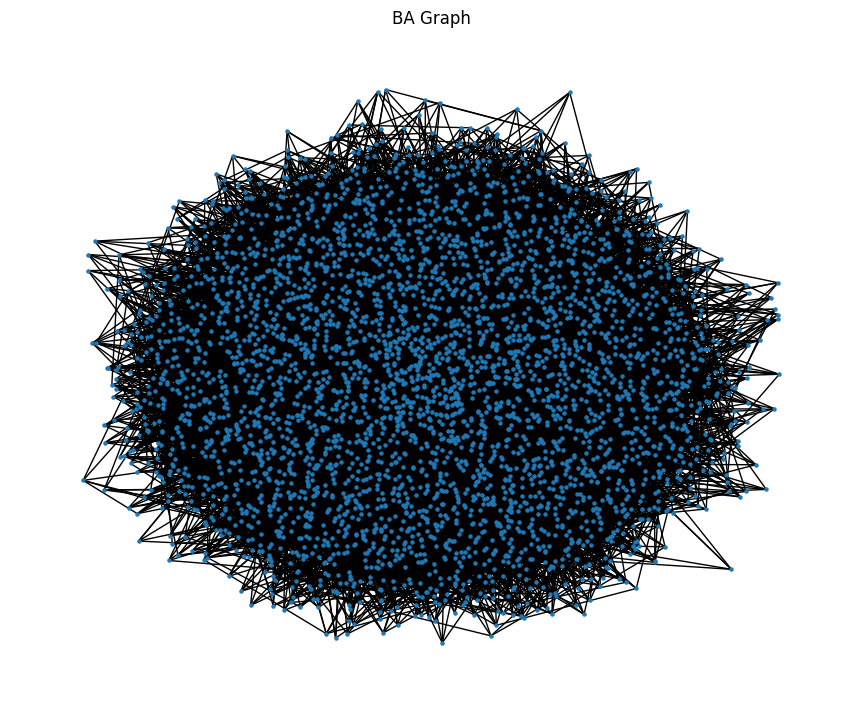

In [ ]:
plt.figure(figsize=(50, 40))#figure size
plt.subplot(4,4,2)# subplot
nx.draw(rand_graph, with_labels=False, node_size=5) #drawing random graph
plt.title("ER Graph")
plt.show()
plt.figure(figsize=(50, 40))
plt.subplot (4,4,2)
nx.draw(watts_graph, with_labels=False, node_size=5)
plt.title("WS graph")
plt.show()
plt.figure(figsize=(50, 40))
plt.subplot (4,4,2)
nx.draw(barabasi_graph, with_labels= False, node_size= 5)
plt.title("BA Graph")
plt.show()


# **KeyFindings**

**Size and connectivity:** The network consists of 4,039 nodes and 88,234 edges. This suggests to us that it is a very large and well connected network.

**DegreeDistribution:** the connectivity patterns are heterogeneous. Meaning some users have high degrees  (More friend Circles) compared to some who have lower degrees (Less friend Circles). This indicates a power law distribution, where highly connected people play vital roles.

**Network cohesion:** the presence of only one weakly connected component suggests a highly cohesive network. This means most of the users can reach each other with a chain of connections.
Information Flow the average shortest path length is of 3.69 that shows that the information travels quickly between the users on average.

**Centrality:** the analysis of degree centrality identified the users with higher connections. These may play an important role in making more friend circles and at a fast pace.

**Clustering:** the clustering coefficient is 0.60 , which indicates the moderate level of local clustering. This means that users connect with friends to tend to know each other, forming smaller communities within the network.

**Sparsity:** The density of 0.10 implies a spare network .This means the no. of actual connections are lower in comparison to the total possible connections between all the users.

# **Conclusion:**

This analysis reveals a large, well connected facebook network with a heterogeneous degree distribution and moderate local clustering. The short average path of 3.69 indicates the efficient information flow among the facebook users. further  analysis of centrality measures can identify the influential users within this network.


In [ ]:
!jupyter nbconvert --to html Data_Driven_Rakshit.ipynb

[NbConvertApp] Converting notebook Data_Driven_Rakshit.ipynb to html
[NbConvertApp] Writing 4774145 bytes to Data_Driven_Rakshit.html
